In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# make sure pandas & numpy are imported
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# Statmodels & patsy
import patsy
import statsmodels.api as sm

from scipy.stats import skewnorm

In [2]:
vehicles_sales = pd.read_csv("autos_mlns.csv")

In [3]:
vehicles_sales.head()

,DATE,MRTSSM441XUSS
0,1992-01-01,30167
1,1992-02-01,30457
2,1992-03-01,29891
3,1992-04-01,30361
4,1992-05-01,30847


In [4]:
vehicles_sales.shape

(339, 2)

In [5]:
vehicles_sales.rename(columns={'MRTSSM441XUSS':'sales','DATE':'date'}, inplace=True)
vehicles_sales.head()

,date,sales
0,1992-01-01,30167
1,1992-02-01,30457
2,1992-03-01,29891
3,1992-04-01,30361
4,1992-05-01,30847


Text(0.5, 1.0, 'Retail sales of autos and other motor vehicles (1992-2020)')

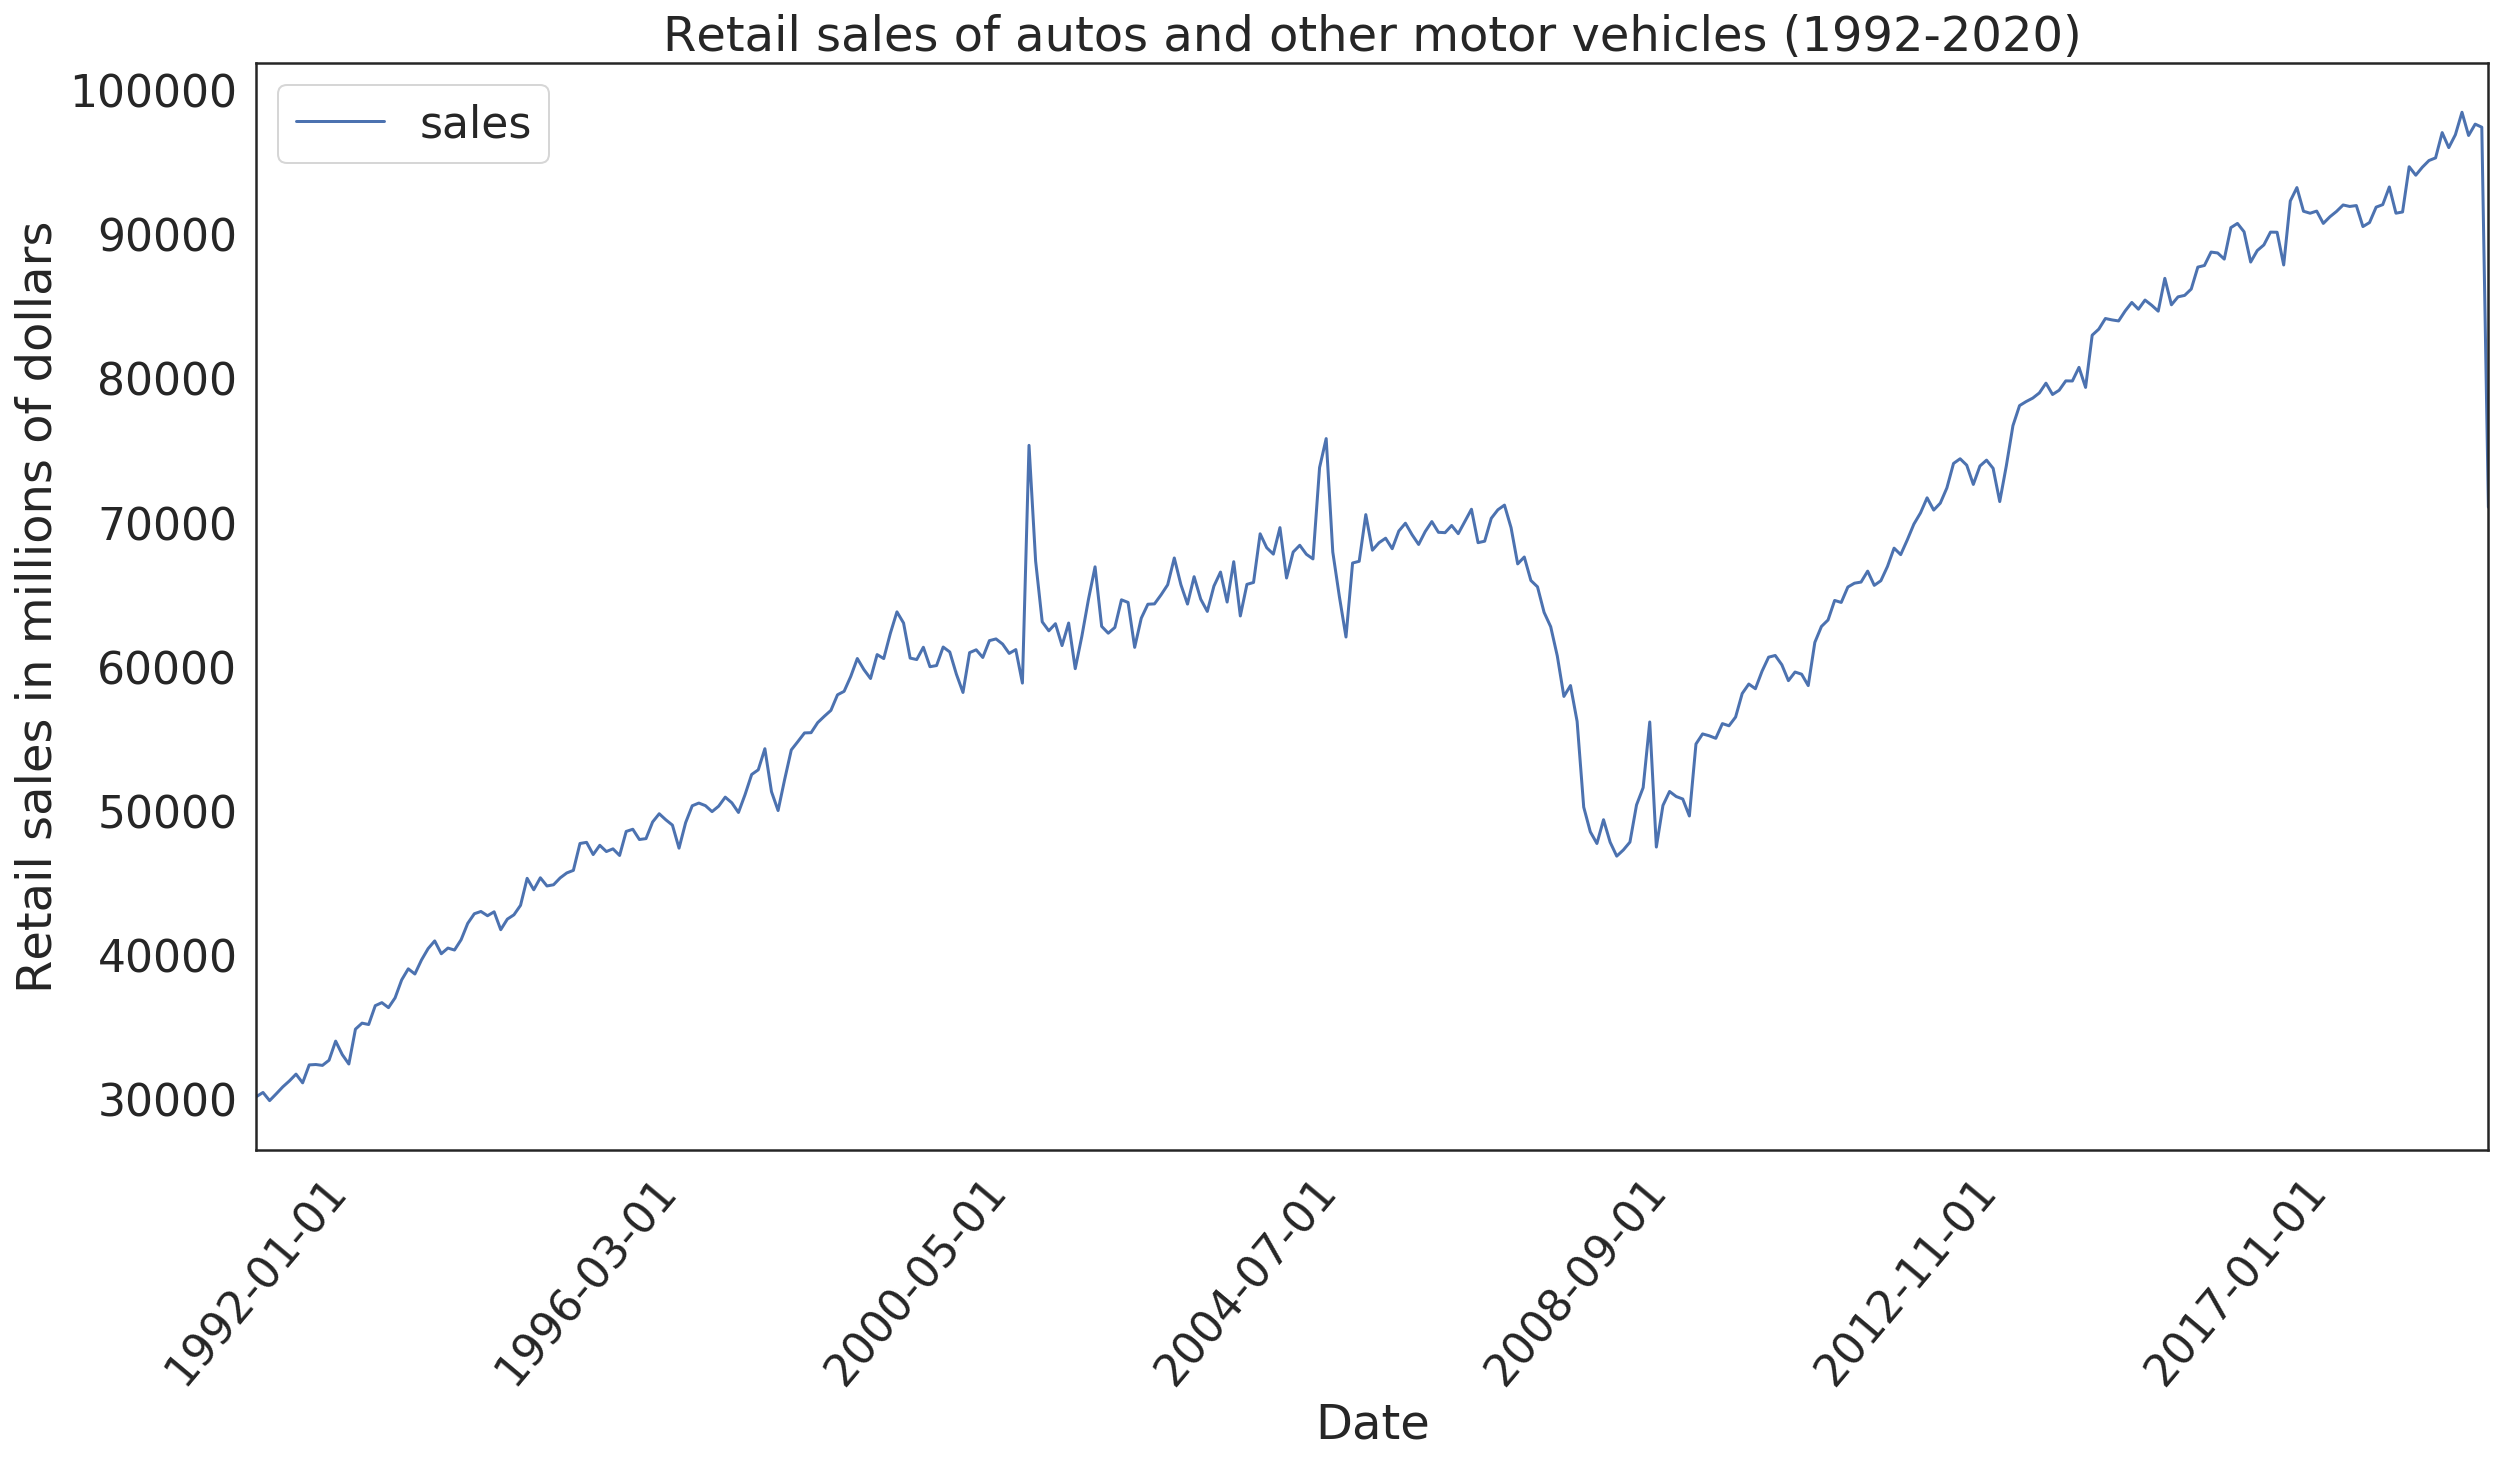

In [6]:
fig = vehicles_sales.plot.line(x='date',rot=50,figsize=(20,10))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Retail sales of autos and other motor vehicles (1992-2020)')

In [7]:
inflation = pd.read_csv("inflation_monthly.csv")

In [8]:
inflation.rename(columns={'Unnamed: 0':'year'}, inplace=True)
inflation = inflation.fillna(0)
inflation = inflation.astype({'year':int})
inflation.set_index('year')
inflation.head()

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1992,0.15%,0.36%,0.51%,0.14%,0.14%,0.36%,0.21%,0.28%,0.28%,0.35%,0.14%,-0.07%
1,1993,0.49%,0.35%,0.35%,0.28%,0.14%,0.14%,0.00%,0.28%,0.21%,0.41%,0.07%,0.00%
2,1994,0.27%,0.34%,0.34%,0.14%,0.07%,0.34%,0.27%,0.40%,0.27%,0.07%,0.13%,0.00%
3,1995,0.40%,0.40%,0.33%,0.33%,0.20%,0.20%,0.00%,0.26%,0.20%,0.33%,-0.07%,-0.07%
4,1996,0.59%,0.32%,0.52%,0.39%,0.19%,0.06%,0.19%,0.19%,0.32%,0.32%,0.19%,0.00%


In [9]:
dic = {}
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Jan']
    d = {(str(inflation.loc[ind, 'year']) + '-01-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Feb']
    d = {(str(inflation.loc[ind, 'year']) + '-02-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Mar']
    d = {(str(inflation.loc[ind, 'year']) + '-03-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Apr']
    d = {(str(inflation.loc[ind, 'year']) + '-04-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'May']
    d = {(str(inflation.loc[ind, 'year']) + '-05-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Jun']
    d = {(str(inflation.loc[ind, 'year']) + '-06-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Jul']
    d = {(str(inflation.loc[ind, 'year']) + '-07-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Aug']
    d = {(str(inflation.loc[ind, 'year']) + '-08-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Sep']
    d = {(str(inflation.loc[ind, 'year']) + '-09-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Oct']
    d = {(str(inflation.loc[ind, 'year']) + '-10-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Nov']
    d = {(str(inflation.loc[ind, 'year']) + '-11-01'):rate}
    dic.update(d)
for ind, row in inflation.iterrows():
    rate = inflation.loc[ind, 'Dec']
    d = {(str(inflation.loc[ind, 'year']) + '-12-01'):rate}
    dic.update(d)

In [10]:
rates = []
for ind, row in vehicles_sales.iterrows():

    date = vehicles_sales.loc[ind, 'date']
    rates.append(dic[date])

vehicles_sales['inflation'] = rates
vehicles_sales

,date,sales,inflation
0,1992-01-01,30167,0.15%
1,1992-02-01,30457,0.36%
2,1992-03-01,29891,0.51%
3,1992-04-01,30361,0.14%
4,1992-05-01,30847,0.14%
...,...,...,...
334,2019-11-01,98460,-0.05%
335,2019-12-01,96848,-0.09%
336,2020-01-01,97637,0.39%
337,2020-02-01,97423,0.27%


In [11]:
for ind, row in vehicles_sales.iterrows():

    percent = vehicles_sales.loc[ind, 'inflation']
    percent = float(percent[:-1])
    vehicles_sales.loc[ind, 'inflation'] = percent

In [12]:
vehicles_sales

,date,sales,inflation
0,1992-01-01,30167,0.15
1,1992-02-01,30457,0.36
2,1992-03-01,29891,0.51
3,1992-04-01,30361,0.14
4,1992-05-01,30847,0.14
...,...,...,...
334,2019-11-01,98460,-0.05
335,2019-12-01,96848,-0.09
336,2020-01-01,97637,0.39
337,2020-02-01,97423,0.27


In [13]:
fraction = []
for ind, row in vehicles_sales.iterrows():
    
    if (ind == 0):
        percent = 1-((vehicles_sales.loc[ind, 'inflation'])/100)
        fraction.append(percent)
    else:
        percent = 1-((vehicles_sales.loc[ind, 'inflation'])/100)
        adjusted = percent * fraction[ind-1]
        fraction.append(adjusted)
    
vehicles_sales['inflation_adjusted'] = fraction
vehicles_sales

,date,sales,inflation,inflation_adjusted
0,1992-01-01,30167,0.15,0.998500
1,1992-02-01,30457,0.36,0.994905
2,1992-03-01,29891,0.51,0.989831
3,1992-04-01,30361,0.14,0.988446
4,1992-05-01,30847,0.14,0.987062
...,...,...,...,...
334,2019-11-01,98460,-0.05,0.533561
335,2019-12-01,96848,-0.09,0.534041
336,2020-01-01,97637,0.39,0.531958
337,2020-02-01,97423,0.27,0.530522


In [14]:
inflation_data = {'inflation rate in %':rates, 'adjusted inflation':fraction}
inflation_df = pd.DataFrame(inflation_data)
inflation_df.to_csv('inflation_values.csv')

In [15]:
inflated = []
for ind, row in vehicles_sales.iterrows():
    
    if (ind == 0):
        sales = vehicles_sales.loc[ind, 'sales']
        inflated.append(sales)
    elif (ind == 339):
        continue
    else:
        sales = vehicles_sales.loc[ind, 'sales']
        percent = (vehicles_sales.loc[ind-1, 'inflation_adjusted'])
        adjusted = sales * percent
        inflated.append(adjusted)

In [16]:
vehicles_sales['sales_adjusted'] = inflated
vehicles_sales.head()

,date,sales,inflation,inflation_adjusted,sales_adjusted
0,1992-01-01,30167,0.15,0.998500,30167.000000
1,1992-02-01,30457,0.36,0.994905,30411.314500
2,1992-03-01,29891,0.51,0.989831,29738.717311
3,1992-04-01,30361,0.14,0.988446,30052.270603
4,1992-05-01,30847,0.14,0.987062,30490.581995


Text(0.5, 1.0, 'Retail sales of autos and other motor vehicles (1992-2020)')

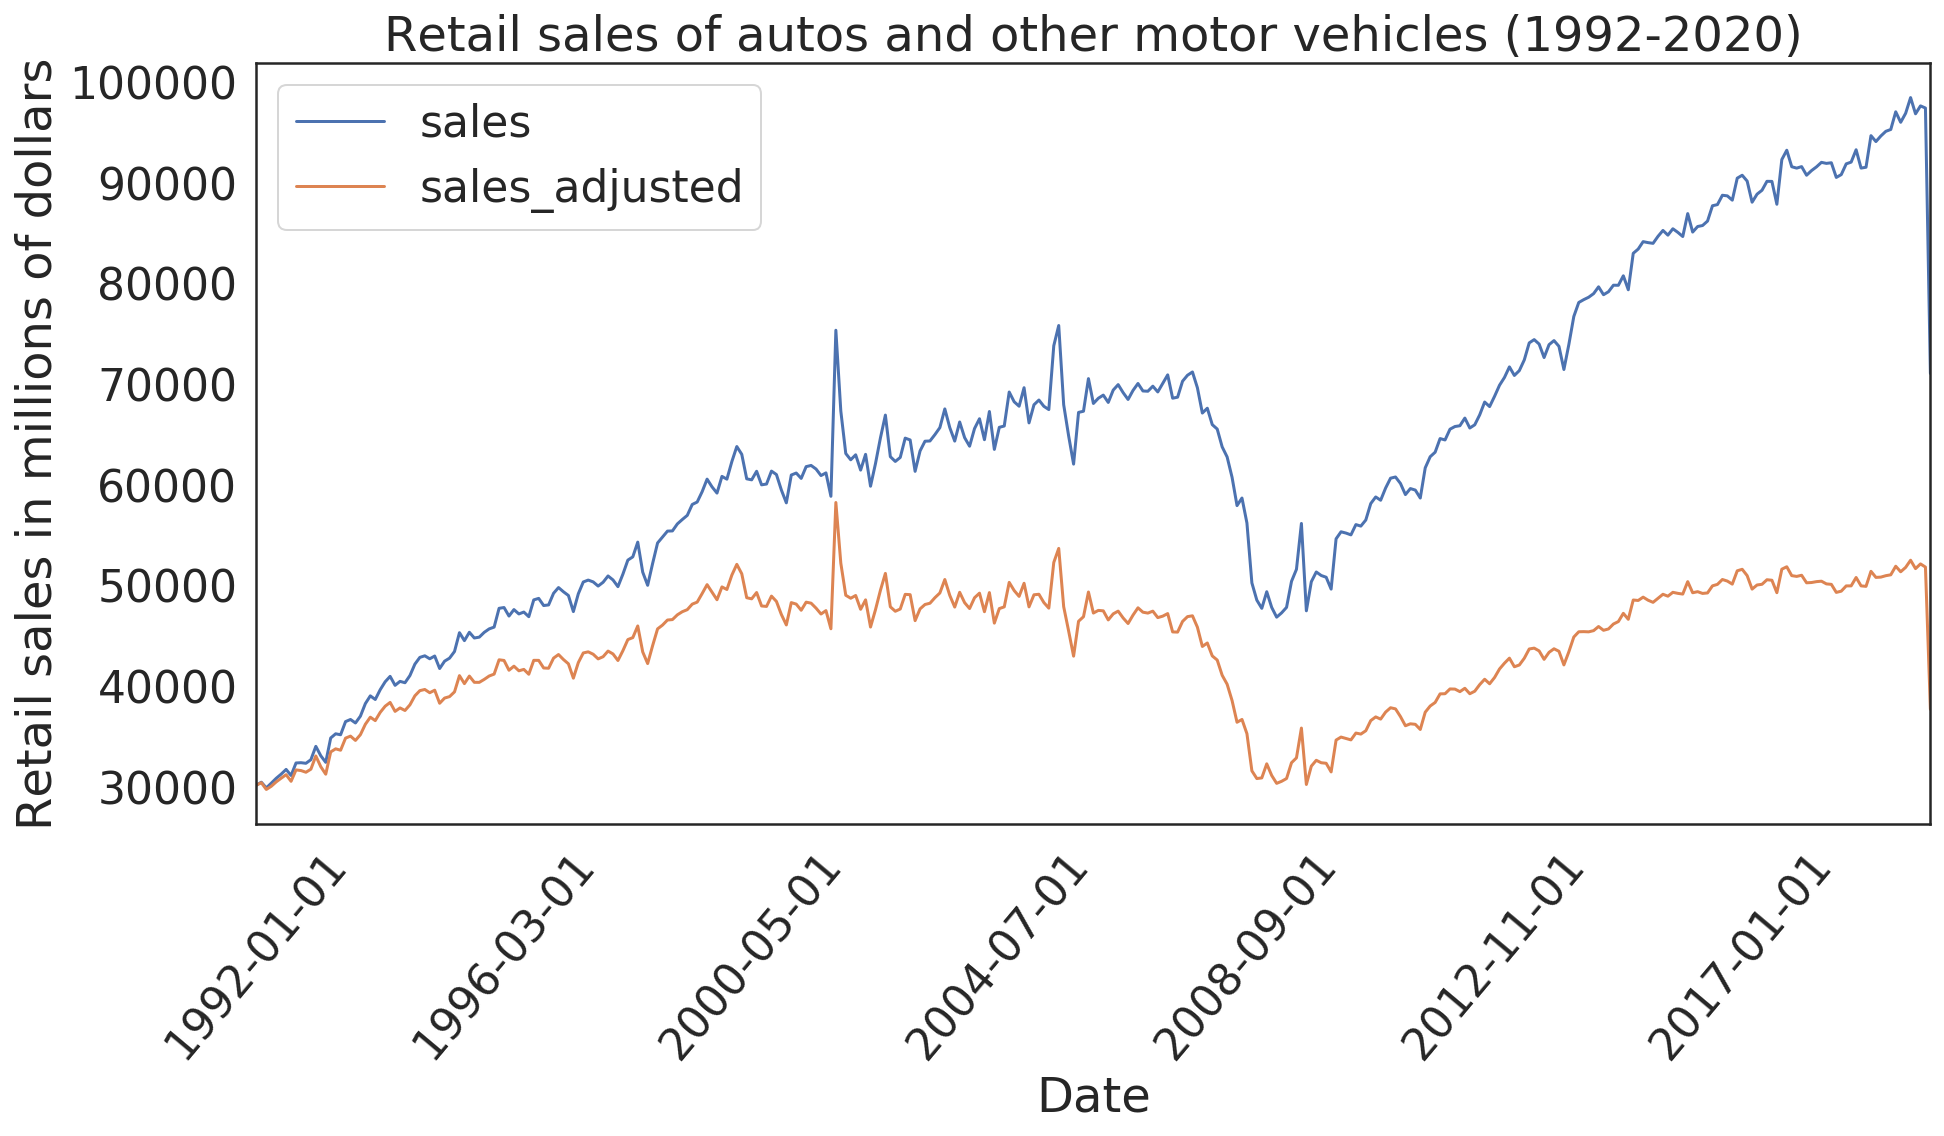

In [17]:
fig = vehicles_sales.plot.line(x='date',y=['sales', 'sales_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Retail sales of autos and other motor vehicles (1992-2020)')

Text(0.5, 1.0, 'Retail sales of autos and other motor vehicles (1992-2020)')

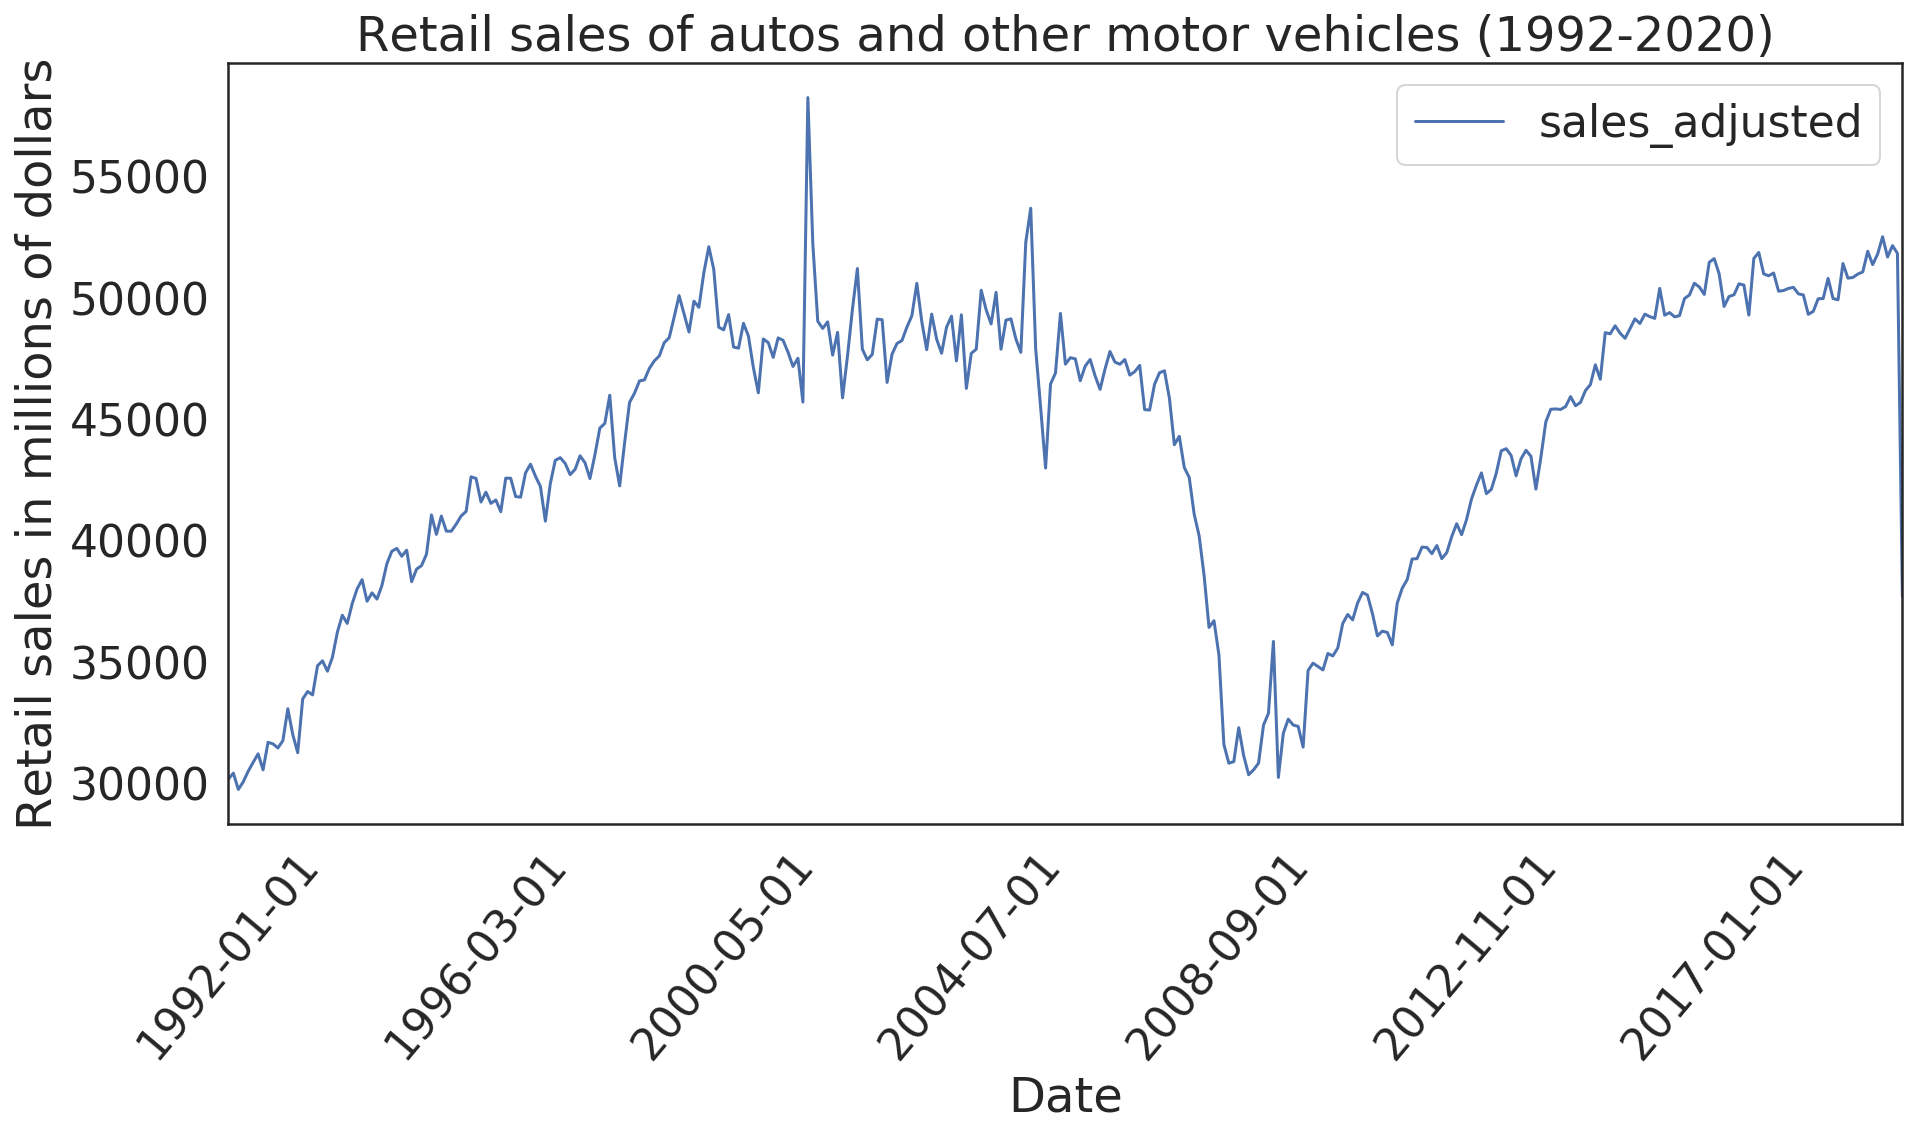

In [18]:
fig = vehicles_sales.plot.line(x='date',y='sales_adjusted',rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Retail sales of autos and other motor vehicles (1992-2020)')

In [19]:
approval_df = pd.read_csv('ApprovalDataTo1989.csv')

In [20]:
approval_df['date_month_only'] = approval_df['End Date'].str[:7]
approval_df

,End Date,Approving,Disapproving,Unsure/NoData,President,date_month_only
0,2020-04-30,46.0,50.500000,5.500000,Trump,2020-04
1,2020-03-31,46.5,48.500000,5.000000,Trump,2020-03
2,2020-02-29,48.0,49.500000,2.500000,Trump,2020-02
3,2020-01-31,46.5,51.500000,2.000000,Trump,2020-01
4,2019-12-31,45.0,51.000000,4.000000,Trump,2019-12
...,...,...,...,...,...,...
374,1989-05-31,58.4,20.400000,20.000000,Bush,1989-05
375,1989-04-30,55.5,16.500000,26.500000,Bush,1989-04
376,1989-03-31,60.0,14.666667,24.333333,Bush,1989-03
377,1989-02-28,60.0,11.000000,27.000000,Bush,1989-02


In [21]:
vehicles_sales['date_month_only'] = vehicles_sales['date'].str[:7]

In [22]:
df_both = pd.merge(vehicles_sales, approval_df, how='outer')

In [23]:
df_both

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President
0,1992-01-01,30167.0,0.15,0.998500,30167.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush
1,1992-02-01,30457.0,0.36,0.994905,30411.314500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush
2,1992-03-01,29891.0,0.51,0.989831,29738.717311,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush
3,1992-04-01,30361.0,0.14,0.988446,30052.270603,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush
4,1992-05-01,30847.0,0.14,0.987062,30490.581995,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush
...,...,...,...,...,...,...,...,...,...,...,...
374,NaN,NaN,NaN,NaN,NaN,1989-05,1989-05-31,58.400000,20.400000,20.000000,Bush
375,NaN,NaN,NaN,NaN,NaN,1989-04,1989-04-30,55.500000,16.500000,26.500000,Bush
376,NaN,NaN,NaN,NaN,NaN,1989-03,1989-03-31,60.000000,14.666667,24.333333,Bush
377,NaN,NaN,NaN,NaN,NaN,1989-02,1989-02-28,60.000000,11.000000,27.000000,Bush


In [24]:
df_both.dropna(inplace=True)

In [25]:
df_both

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President
0,1992-01-01,30167.0,0.15,0.998500,30167.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush
1,1992-02-01,30457.0,0.36,0.994905,30411.314500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush
2,1992-03-01,29891.0,0.51,0.989831,29738.717311,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush
3,1992-04-01,30361.0,0.14,0.988446,30052.270603,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush
4,1992-05-01,30847.0,0.14,0.987062,30490.581995,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush
...,...,...,...,...,...,...,...,...,...,...,...
337,2019-11-01,98460.0,-0.05,0.533561,52508.161654,2019-11,2019-11-30,43.000000,54.000000,3.000000,Trump
338,2019-12-01,96848.0,-0.09,0.534041,51674.315408,2019-12,2019-12-31,45.000000,51.000000,4.000000,Trump
339,2020-01-01,97637.0,0.39,0.531958,52142.180800,2020-01,2020-01-31,46.500000,51.500000,2.000000,Trump
340,2020-02-01,97423.0,0.27,0.530522,51824.987188,2020-02,2020-02-29,48.000000,49.500000,2.500000,Trump


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'The relationship between approval of the president and retail sales of motor vehicles (1992-2020)')

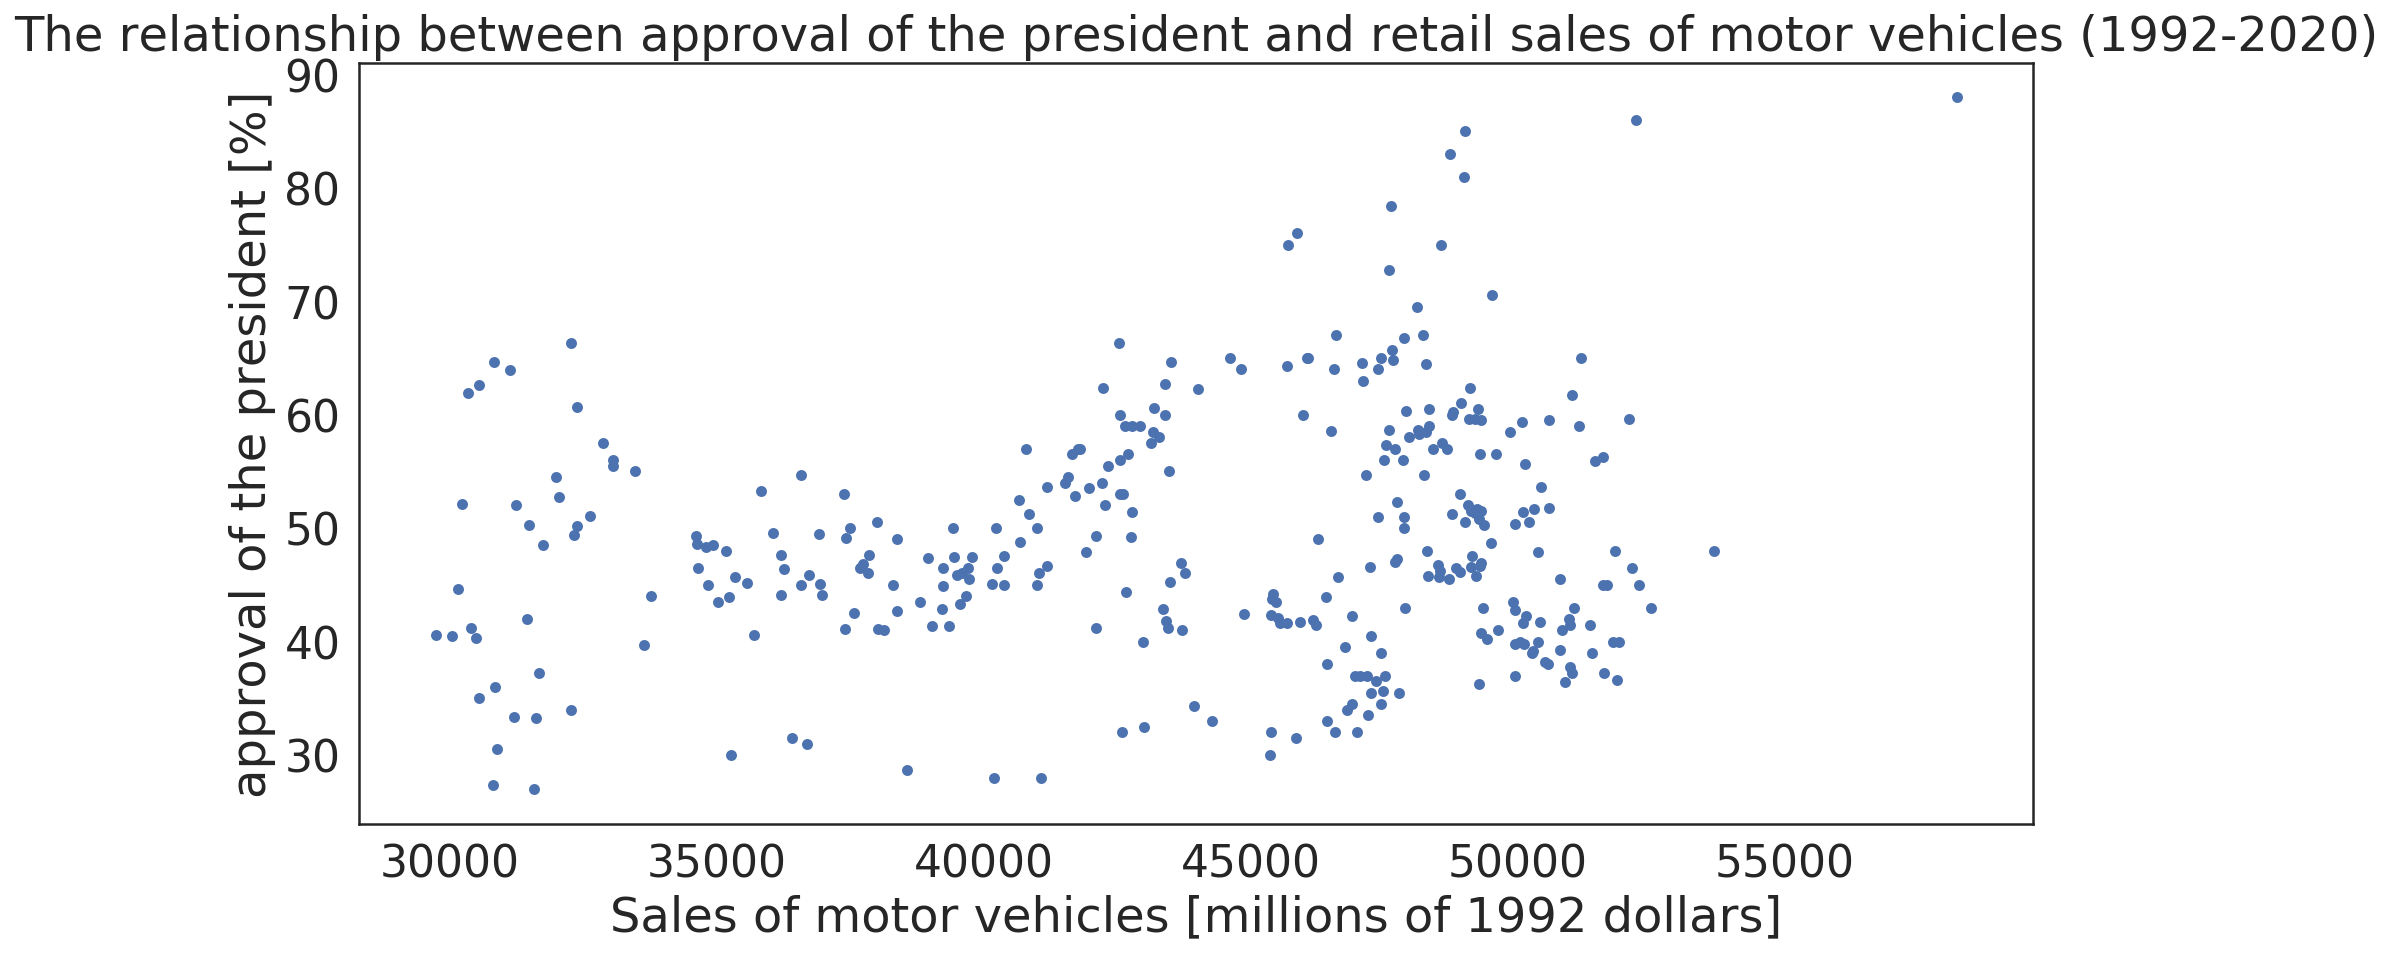

In [26]:
fig = df_both.plot.scatter(x='sales_adjusted', y='Approving', figsize=(15,7))
fig.set_xlabel('Sales of motor vehicles [millions of 1992 dollars]')
fig.set_ylabel('approval of the president [%]')
fig.set_title('The relationship between approval of the president and retail sales of motor vehicles (1992-2020)')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'The relationship between disapproval of the president and retail sales of motor vehicles (1992-2020)')

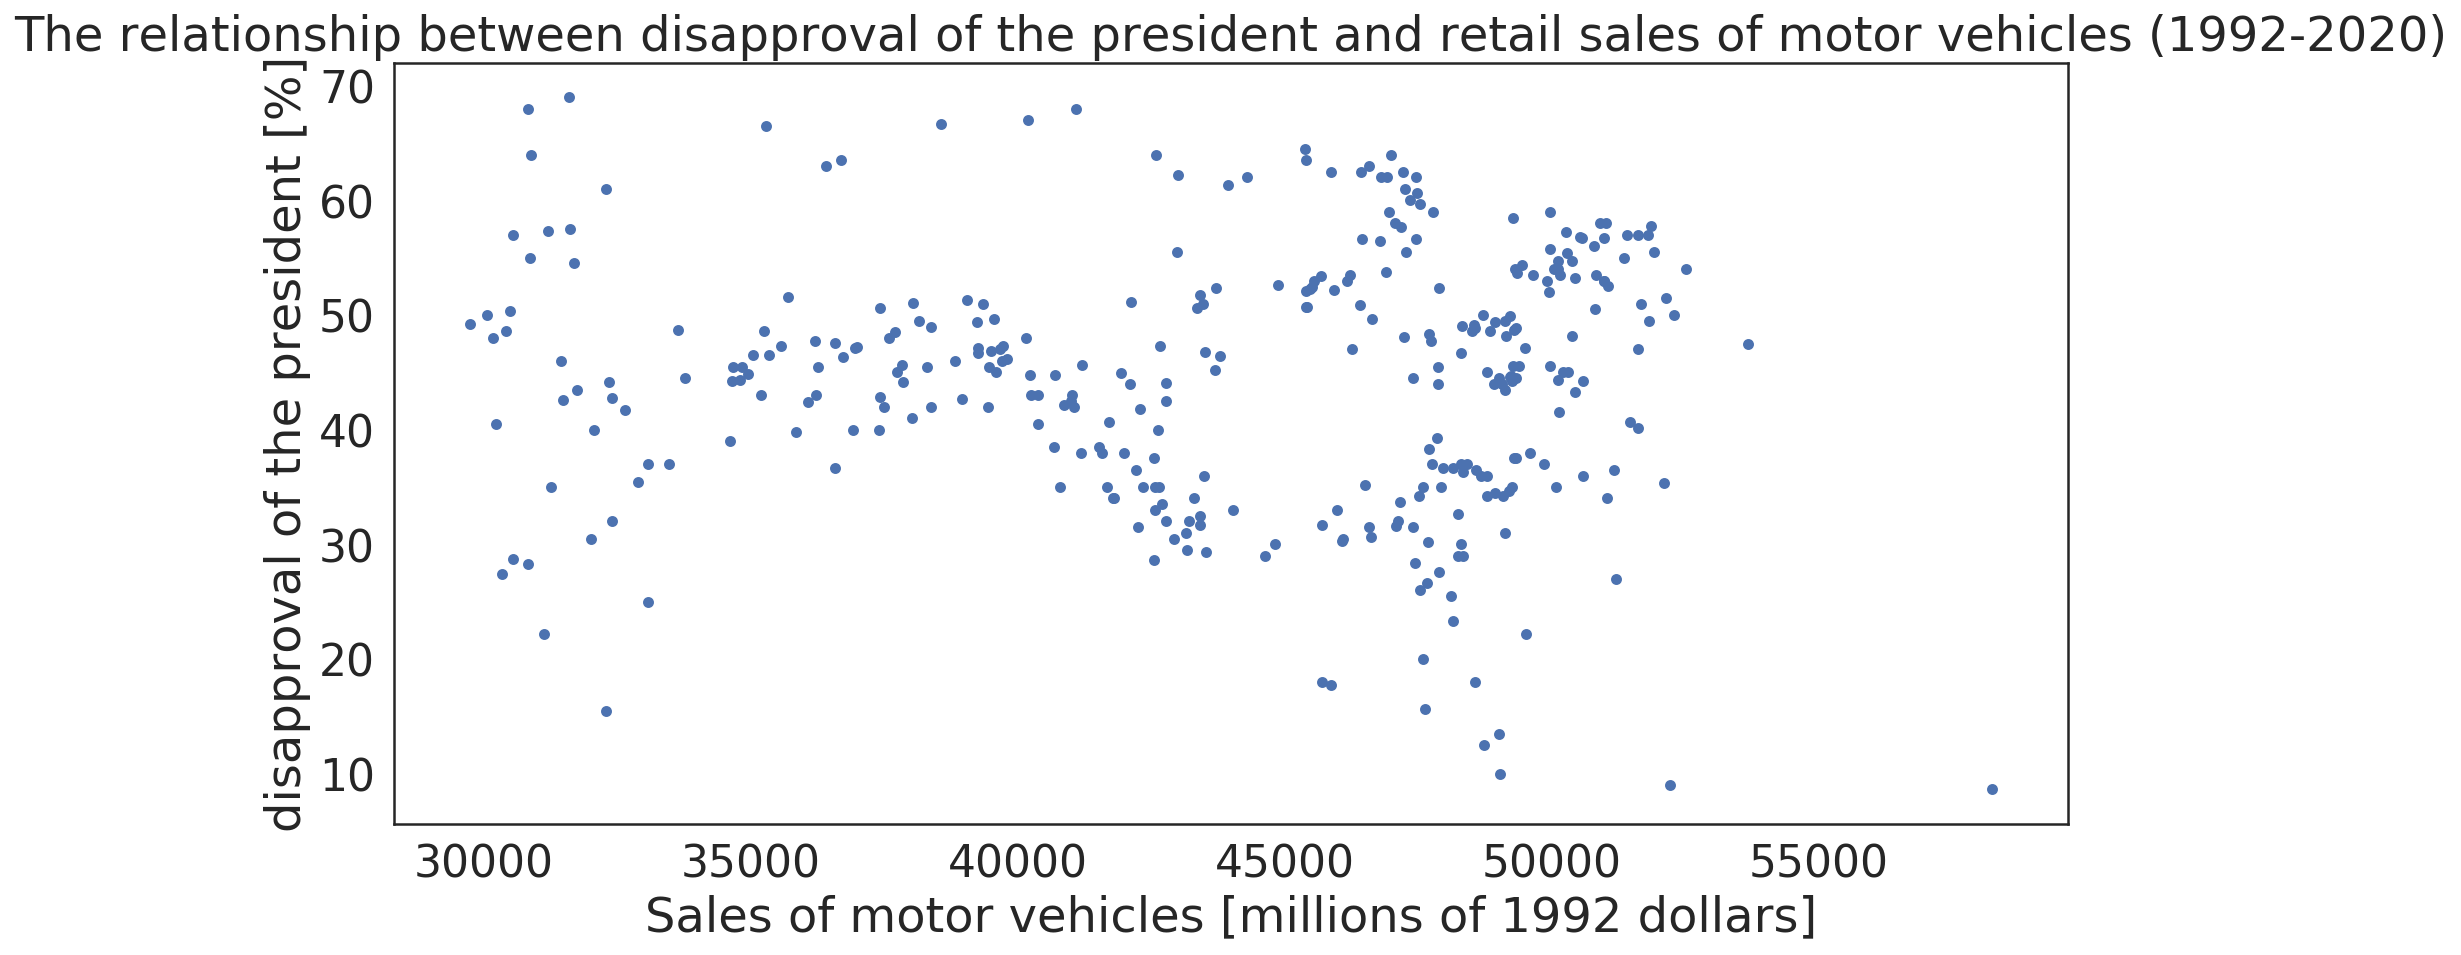

In [27]:
fig = df_both.plot.scatter(x='sales_adjusted', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Sales of motor vehicles [millions of 1992 dollars]')
fig.set_ylabel('disapproval of the president [%]')
fig.set_title('The relationship between disapproval of the president and retail sales of motor vehicles (1992-2020)')

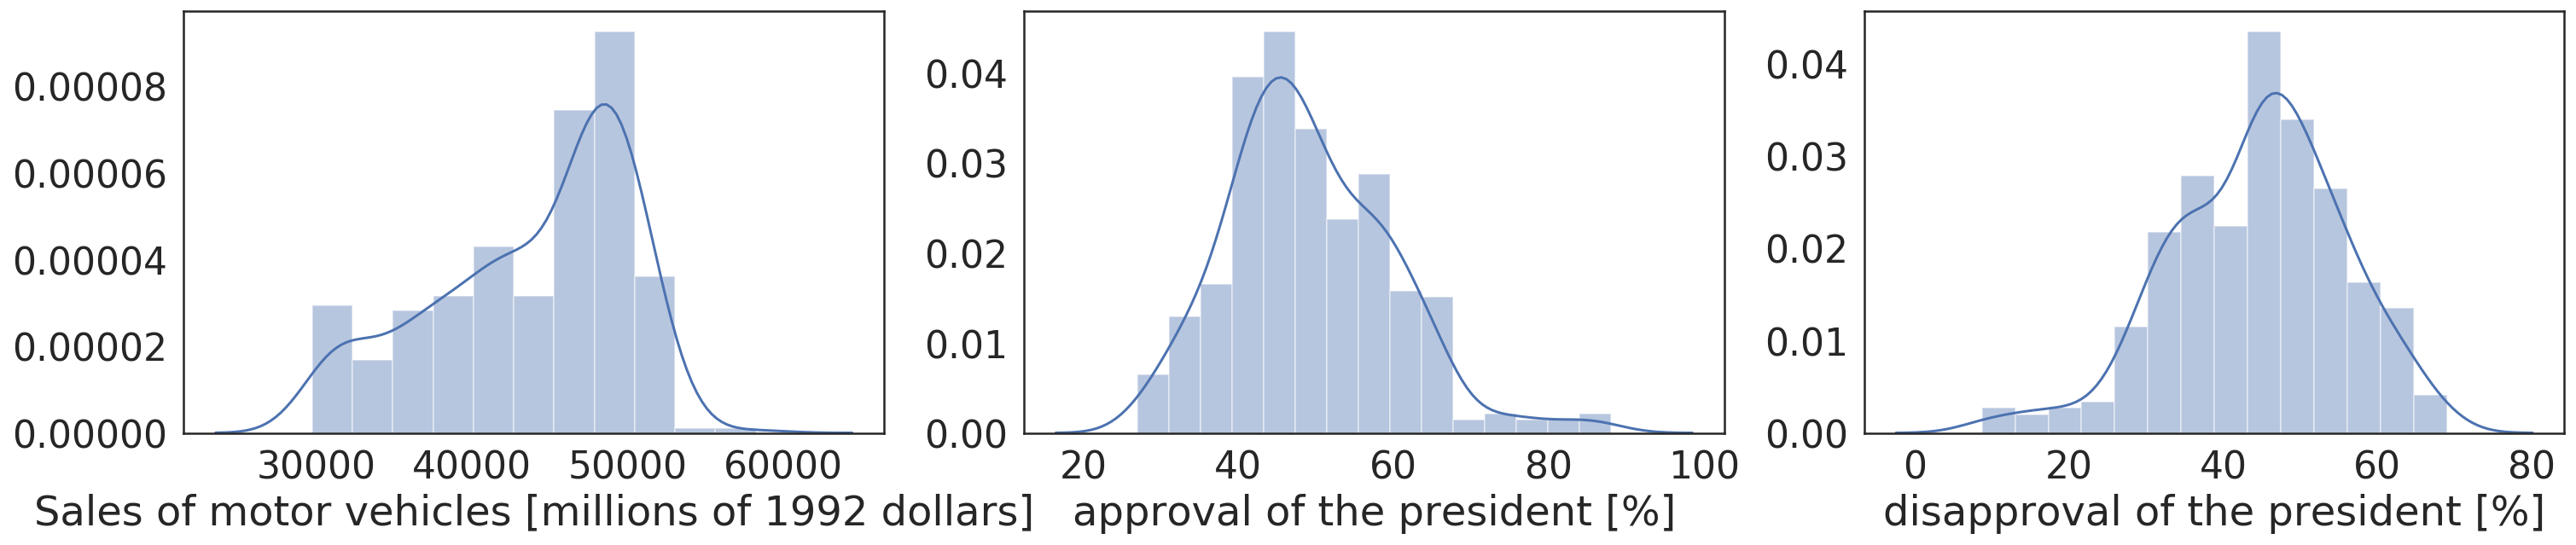

In [57]:
plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_both['sales_adjusted'])
plt.xlabel('Sales of motor vehicles [millions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df_both['Approving'])
plt.xlabel('approval of the president [%]');

plt.subplot(233)
sns.distplot(df_both['Disapproving'])
plt.xlabel('disapproval of the president [%]');

In [29]:
outcome, predictors = patsy.dmatrices('Approving ~ sales_adjusted', df_both)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     9.983
Date:                Wed, 27 May 2020   Prob (F-statistic):            0.00172
Time:                        04:11:55   Log-Likelihood:                -1288.8
No. Observations:                 342   AIC:                             2582.
Df Residuals:                     340   BIC:                             2589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.5835      4.019      9.

### As we can see on the graph below, the trendline is practically horizontal so there seems to be no correlation.

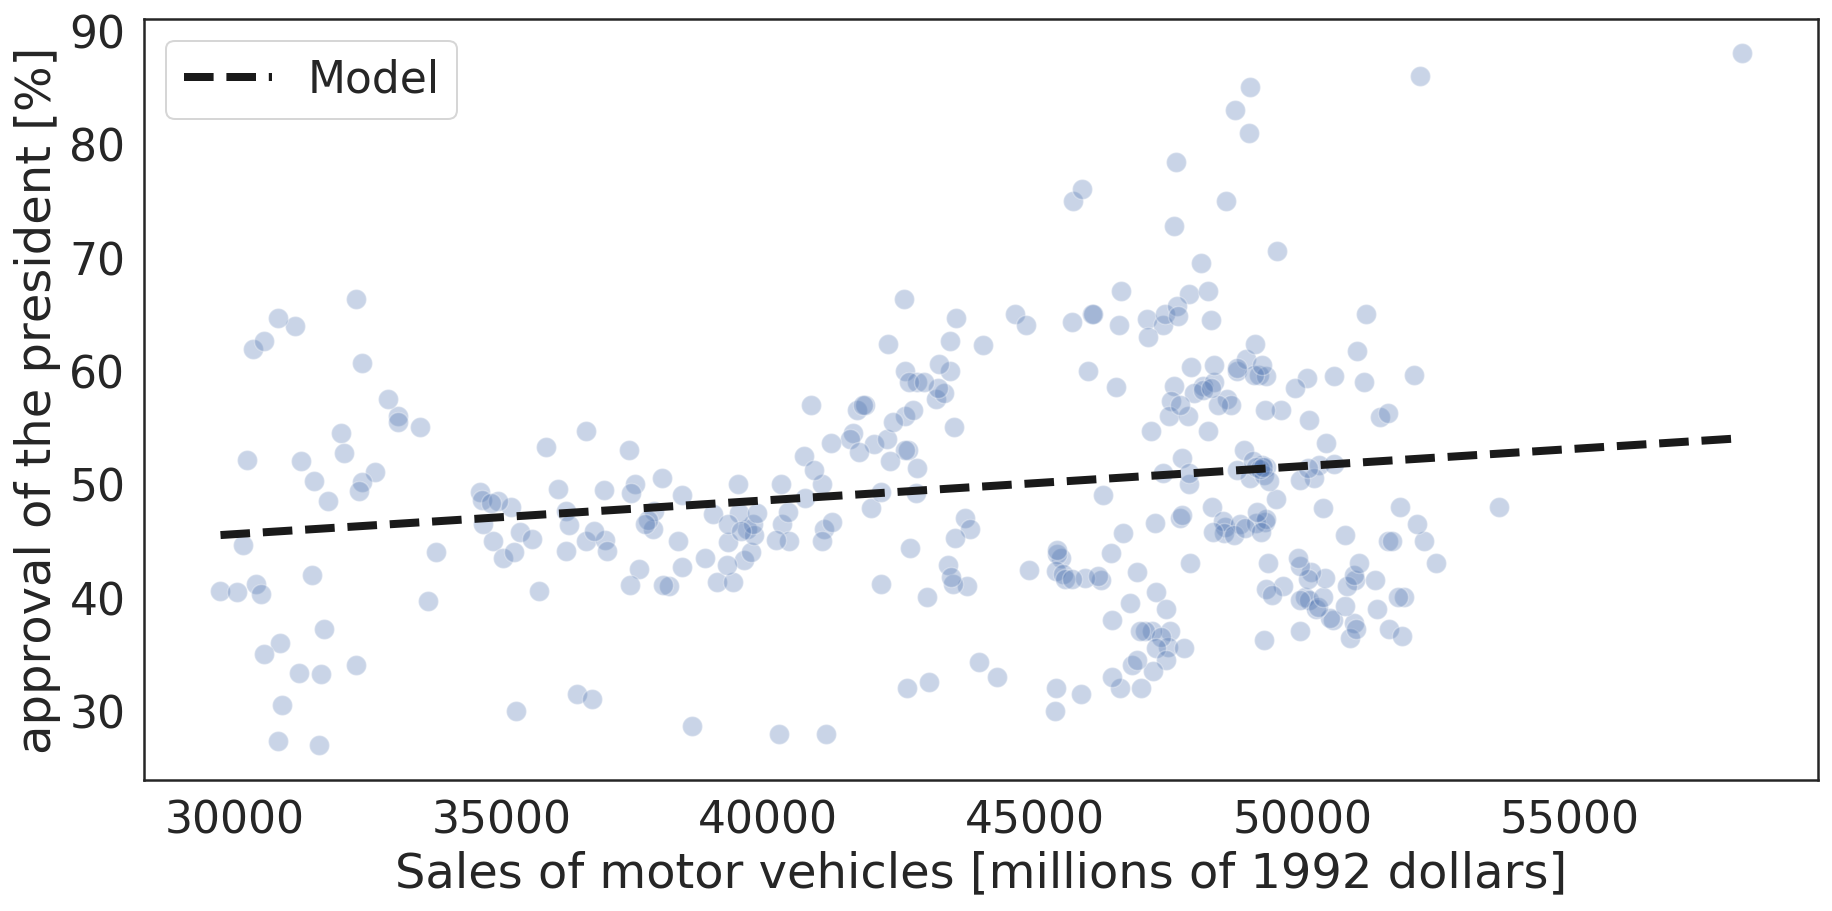

In [53]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='sales_adjusted', y='Approving', alpha=0.3, data=df_both, s=100)

# Generate and plot the model fit line
xs = np.arange(df_both['sales_adjusted'].min(), df_both['sales_adjusted'].max())
ys = 0.0003 * xs + 36.5835
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of motor vehicles [millions of 1992 dollars]')
plt.ylabel('approval of the president [%]')
plt.legend();

### Transforming the sales data into percent of the max so that it's comparable to approval data

In [31]:
df_both['sales_percent_max'] = ((df_both['sales_adjusted'] / df_both['sales_adjusted'].max()) * 100)
df_both

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President,sales_percent_max
0,1992-01-01,30167.0,0.15,0.998500,30167.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush,51.796861
1,1992-02-01,30457.0,0.36,0.994905,30411.314500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush,52.216350
2,1992-03-01,29891.0,0.51,0.989831,29738.717311,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush,51.061498
3,1992-04-01,30361.0,0.14,0.988446,30052.270603,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush,51.599870
4,1992-05-01,30847.0,0.14,0.987062,30490.581995,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush,52.352453
...,...,...,...,...,...,...,...,...,...,...,...,...
337,2019-11-01,98460.0,-0.05,0.533561,52508.161654,2019-11,2019-11-30,43.000000,54.000000,3.000000,Trump,90.156726
338,2019-12-01,96848.0,-0.09,0.534041,51674.315408,2019-12,2019-12-31,45.000000,51.000000,4.000000,Trump,88.725009
339,2020-01-01,97637.0,0.39,0.531958,52142.180800,2020-01,2020-01-31,46.500000,51.500000,2.000000,Trump,89.528336
340,2020-02-01,97423.0,0.27,0.530522,51824.987188,2020-02,2020-02-29,48.000000,49.500000,2.500000,Trump,88.983713


Text(0.5, 1.0, 'Retail sales of autos and other motor vehicles (1992-2020)')

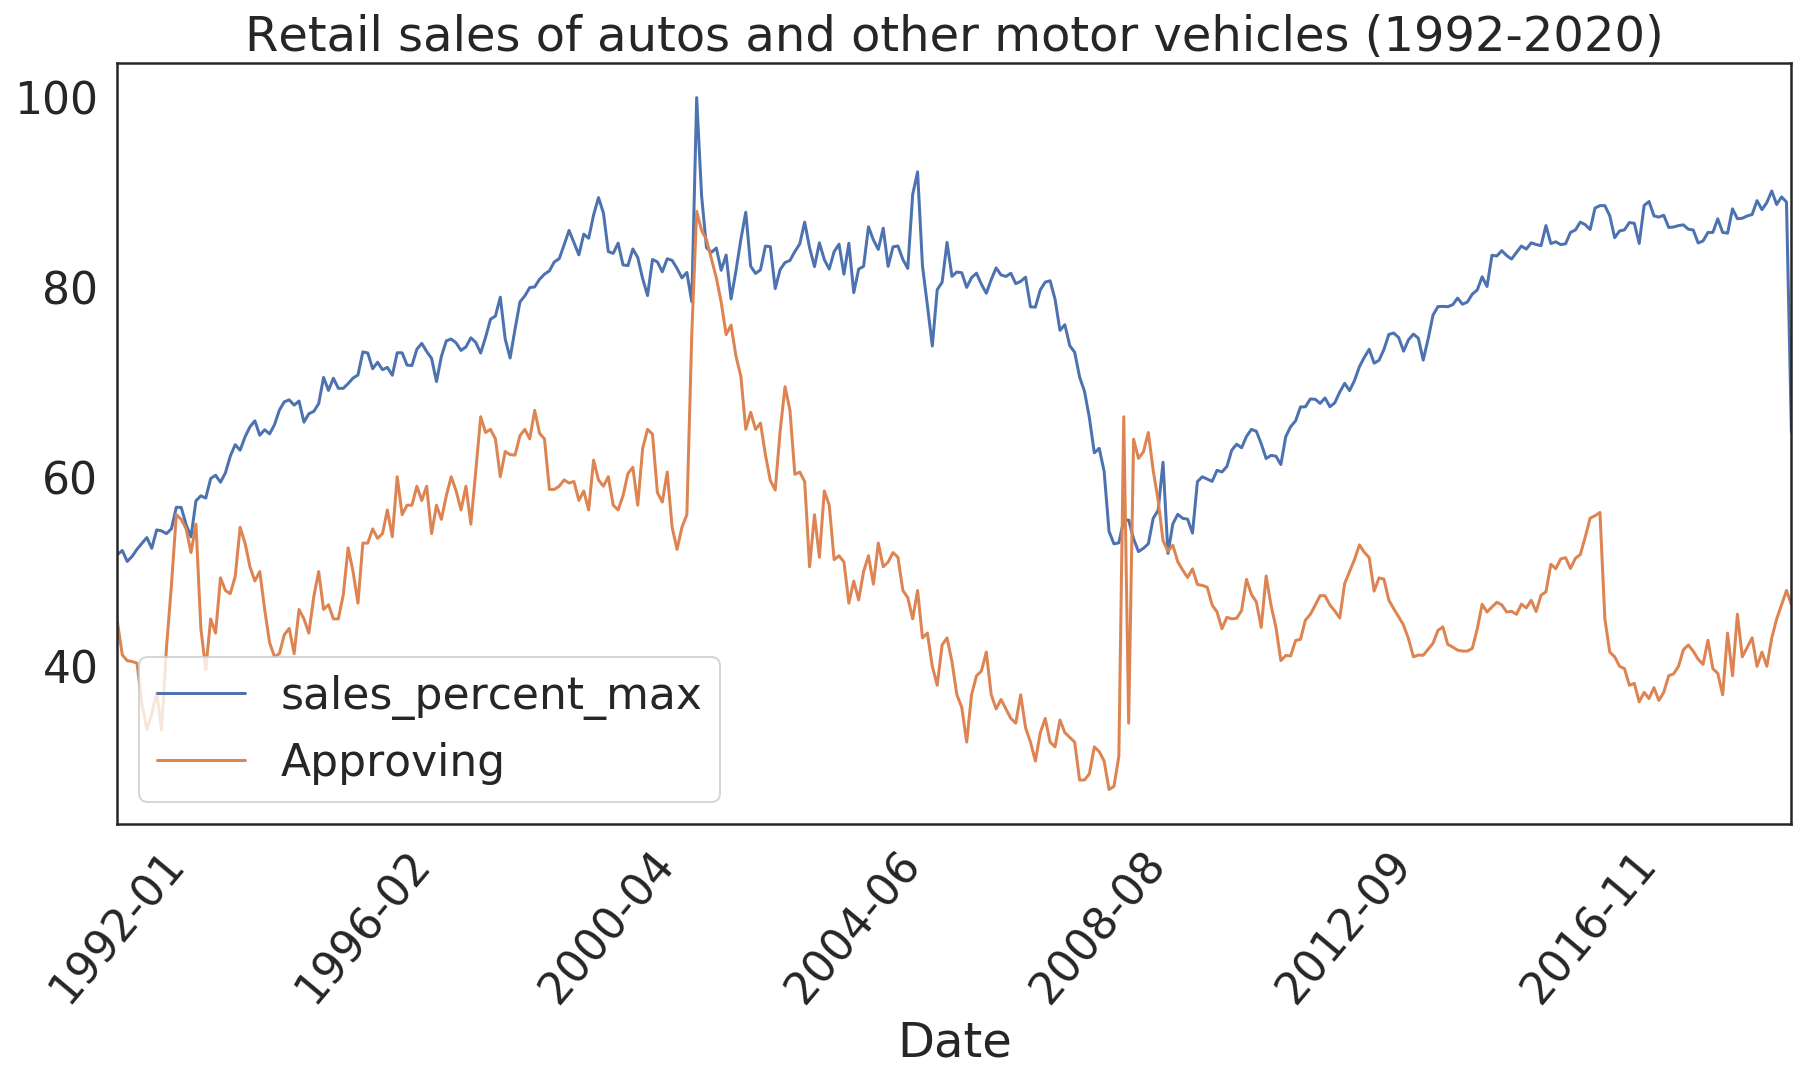

In [32]:
fig = df_both.plot.line(x='date_month_only',y=['sales_percent_max', 'Approving'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Retail sales of autos and other motor vehicles (1992-2020)')

### Explanation of the peak around 2009 at the lowest sales (2008 crisis ending)

In [33]:
df_both[df_both['date_month_only'] == '2009-01']

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President,sales_percent_max
205,2009-01-01,49379.0,0.44,0.650911,32283.39792,2009-01,2009-01-31,66.333333,15.444444,18.333333,Obama,55.430725
206,2009-01-01,49379.0,0.44,0.650911,32283.39792,2009-01,2009-01-31,34.000000,61.000000,5.000000,GW Bush,55.430725


### Transforming the approval data to fraction of approval over approval + disapproval to take care of the variance in no data/unsure

In [34]:
df_both['approval_to_disapproval'] = ((df_both['Approving'] / (df_both['Approving'] + df_both['Disapproving'])) * 100)

In [35]:
df_both

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President,sales_percent_max,approval_to_disapproval
0,1992-01-01,30167.0,0.15,0.998500,30167.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush,51.796861,48.201439
1,1992-02-01,30457.0,0.36,0.994905,30411.314500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush,52.216350,45.879733
2,1992-03-01,29891.0,0.51,0.989831,29738.717311,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush,51.061498,45.211581
3,1992-04-01,30361.0,0.14,0.988446,30052.270603,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush,51.599870,44.751381
4,1992-05-01,30847.0,0.14,0.987062,30490.581995,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush,52.352453,44.485294
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2019-11-01,98460.0,-0.05,0.533561,52508.161654,2019-11,2019-11-30,43.000000,54.000000,3.000000,Trump,90.156726,44.329897
338,2019-12-01,96848.0,-0.09,0.534041,51674.315408,2019-12,2019-12-31,45.000000,51.000000,4.000000,Trump,88.725009,46.875000
339,2020-01-01,97637.0,0.39,0.531958,52142.180800,2020-01,2020-01-31,46.500000,51.500000,2.000000,Trump,89.528336,47.448980
340,2020-02-01,97423.0,0.27,0.530522,51824.987188,2020-02,2020-02-29,48.000000,49.500000,2.500000,Trump,88.983713,49.230769


Text(0.5, 1.0, 'Retail sales of autos and other motor vehicles (1992-2020)')

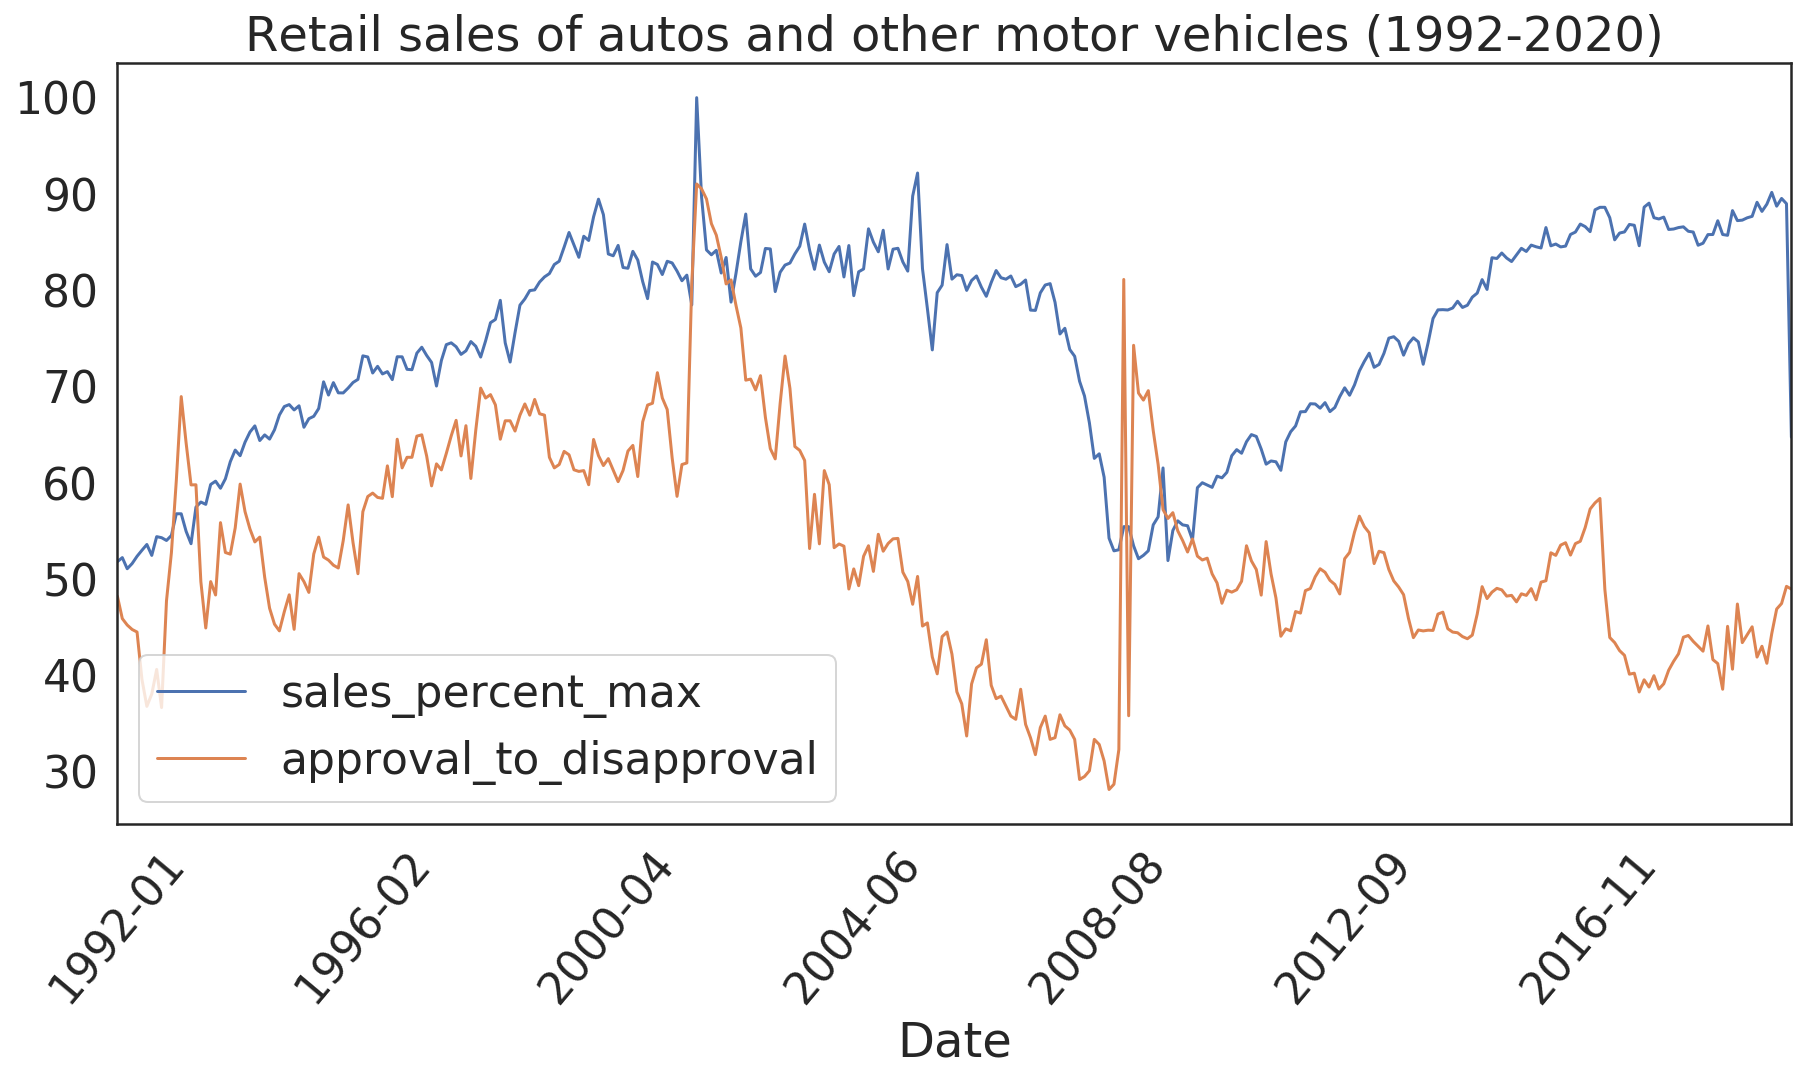

In [36]:
fig = df_both.plot.line(x='date_month_only',y=['sales_percent_max', 'approval_to_disapproval'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Retail sales of autos and other motor vehicles (1992-2020)')

In [37]:
outcome2, predictors2 = patsy.dmatrices('approval_to_disapproval ~ sales_percent_max', df_both)
mod2 = sm.OLS(outcome2, predictors2)
## fit the model
res2 = mod2.fit()
9
## look at the results
print(res2.summary())

                               OLS Regression Results                              
Dep. Variable:     approval_to_disapproval   R-squared:                       0.008
Model:                                 OLS   Adj. R-squared:                  0.005
Method:                      Least Squares   F-statistic:                     2.734
Date:                     Wed, 27 May 2020   Prob (F-statistic):             0.0991
Time:                             04:11:59   Log-Likelihood:                -1322.0
No. Observations:                      342   AIC:                             2648.
Df Residuals:                          340   BIC:                             2656.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

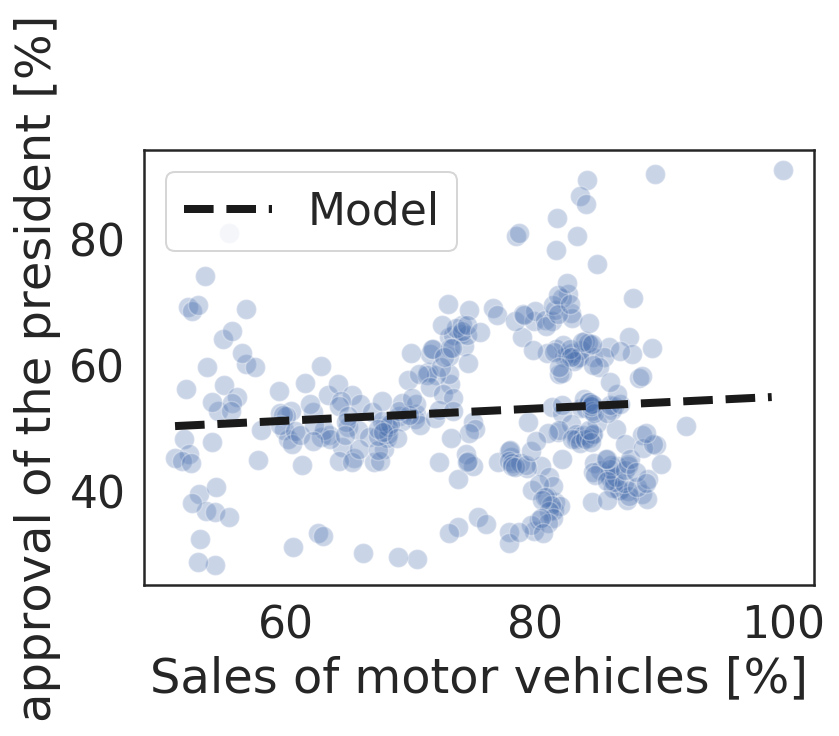

In [38]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='sales_percent_max', y='approval_to_disapproval', alpha=0.3, data=df_both, s=100)

# Generate and plot the model fit line
xs2 = np.arange(df_both['sales_percent_max'].min(), df_both['sales_percent_max'].max())
ys2 = 0.0964 * xs2 + 45.3929
plt.plot(xs2, ys2, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of motor vehicles [%]')
plt.ylabel('approval of the president [%]')
plt.legend();

### There seems to be a positive correlation till about 2008-2009 and then a negative correlation. Let's explore it further:

In [39]:
df_2008 = df_both[:200]

In [40]:
df_2008

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President,sales_percent_max,approval_to_disapproval
0,1992-01-01,30167.0,0.15,0.998500,30167.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush,51.796861,48.201439
1,1992-02-01,30457.0,0.36,0.994905,30411.314500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush,52.216350,45.879733
2,1992-03-01,29891.0,0.51,0.989831,29738.717311,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush,51.061498,45.211581
3,1992-04-01,30361.0,0.14,0.988446,30052.270603,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush,51.599870,44.751381
4,1992-05-01,30847.0,0.14,0.987062,30490.581995,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush,52.352453,44.485294
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2008-03-01,65537.0,0.87,0.644257,42593.203964,2008-03,2008-03-31,32.000000,64.000000,4.000000,GW Bush,73.132704,33.333333
196,2008-04-01,63765.0,0.61,0.640327,41081.020441,2008-04,2008-04-30,28.000000,68.000000,4.500000,GW Bush,70.536279,29.166667
197,2008-05-01,62769.0,0.84,0.634948,40192.660913,2008-05,2008-05-31,28.000000,67.000000,5.000000,GW Bush,69.010962,29.473684
198,2008-06-01,60739.0,1.01,0.628535,38566.098395,2008-06,2008-06-30,28.666667,66.666667,4.666667,GW Bush,66.218147,30.069930


In [41]:
outcome3, predictors3 = patsy.dmatrices('approval_to_disapproval ~ sales_percent_max', df_2008)
mod3 = sm.OLS(outcome3, predictors3)
## fit the model
res3 = mod3.fit()

## look at the results
print(res3.summary())

                               OLS Regression Results                              
Dep. Variable:     approval_to_disapproval   R-squared:                       0.100
Model:                                 OLS   Adj. R-squared:                  0.095
Method:                      Least Squares   F-statistic:                     21.90
Date:                     Wed, 27 May 2020   Prob (F-statistic):           5.32e-06
Time:                             04:12:00   Log-Likelihood:                -784.01
No. Observations:                      200   AIC:                             1572.
Df Residuals:                          198   BIC:                             1579.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### Definitely some positive correlation, much more distinct than with the 1992-2020 data

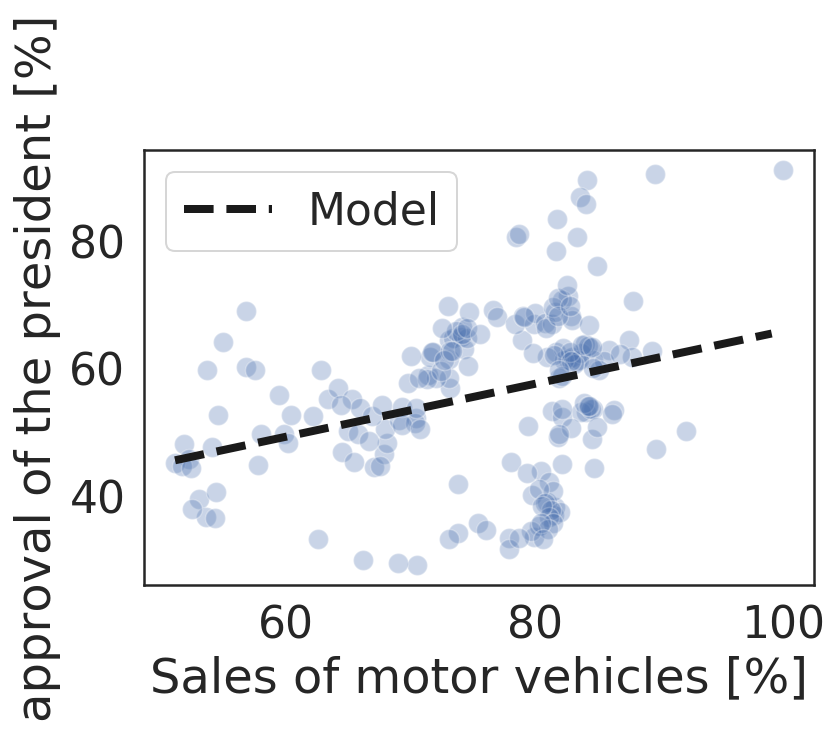

In [42]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='sales_percent_max', y='approval_to_disapproval', alpha=0.3, data=df_2008, s=100)

# Generate and plot the model fit line
xs3 = np.arange(df_2008['sales_percent_max'].min(), df_2008['sales_percent_max'].max())
ys3 = 0.4137 * xs3 + 24.5096
plt.plot(xs3, ys3, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of motor vehicles [%]')
plt.ylabel('approval of the president [%]')
plt.legend();

In [43]:
df_2020 = df_both[200:]
df_2020

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President,sales_percent_max,approval_to_disapproval
200,2008-08-01,58687.0,-0.4,0.627704,36691.327019,2008-08,2008-08-31,31.000000,63.5,5.500000,GW Bush,62.999157,32.804233
201,2008-09-01,56200.0,-0.14,0.628583,35276.991306,2008-09,2008-09-30,30.000000,66.5,3.500000,GW Bush,60.570737,31.088083
202,2008-10-01,50253.0,-1.01,0.634932,31588.194459,2008-10,2008-10-31,27.000000,69.0,4.333333,GW Bush,54.237058,28.125000
203,2008-11-01,48542.0,-1.92,0.647123,30820.866659,2008-11,2008-11-30,27.333333,68.0,4.666667,GW Bush,52.919553,28.671329
204,2008-12-01,47728.0,-1.03,0.653788,30885.869468,2008-12,2008-12-31,30.500000,64.0,5.500000,GW Bush,53.031163,32.275132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2019-11-01,98460.0,-0.05,0.533561,52508.161654,2019-11,2019-11-30,43.000000,54.0,3.000000,Trump,90.156726,44.329897
338,2019-12-01,96848.0,-0.09,0.534041,51674.315408,2019-12,2019-12-31,45.000000,51.0,4.000000,Trump,88.725009,46.875000
339,2020-01-01,97637.0,0.39,0.531958,52142.180800,2020-01,2020-01-31,46.500000,51.5,2.000000,Trump,89.528336,47.448980
340,2020-02-01,97423.0,0.27,0.530522,51824.987188,2020-02,2020-02-29,48.000000,49.5,2.500000,Trump,88.983713,49.230769


In [44]:
outcome4, predictors4 = patsy.dmatrices('approval_to_disapproval ~ sales_percent_max', df_2020)
mod4 = sm.OLS(outcome4, predictors4)
## fit the model
res4 = mod4.fit()

## look at the results
print(res4.summary())

                               OLS Regression Results                              
Dep. Variable:     approval_to_disapproval   R-squared:                       0.125
Model:                                 OLS   Adj. R-squared:                  0.119
Method:                      Least Squares   F-statistic:                     20.01
Date:                     Wed, 27 May 2020   Prob (F-statistic):           1.58e-05
Time:                             04:12:01   Log-Likelihood:                -480.97
No. Observations:                      142   AIC:                             965.9
Df Residuals:                          140   BIC:                             971.8
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### Negative correlation from 2008-2020 suggesting something else at play here

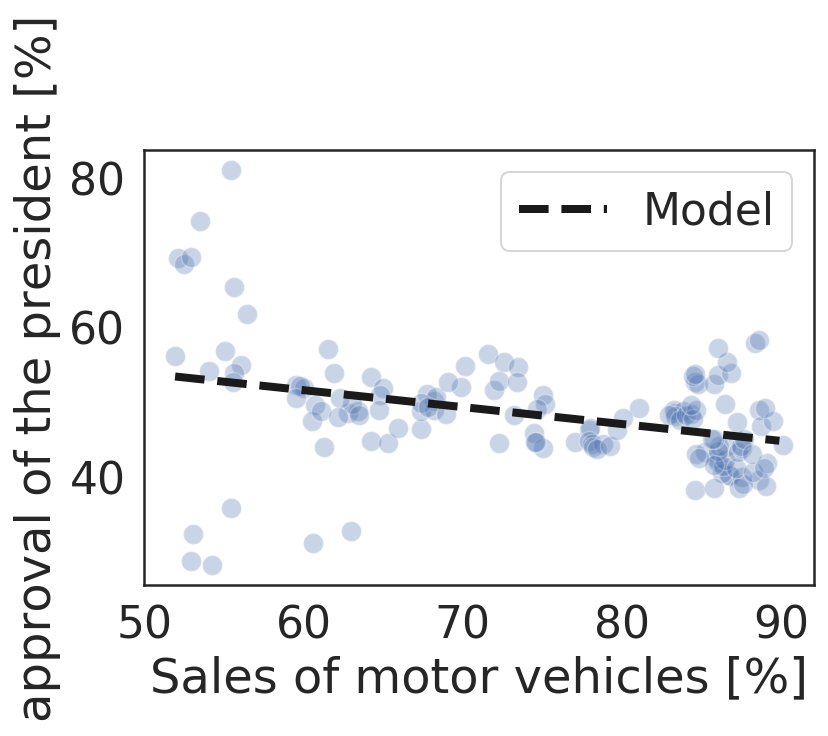

In [45]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='sales_percent_max', y='approval_to_disapproval', alpha=0.3, data=df_2020, s=100)

# Generate and plot the model fit line
xs4 = np.arange(df_2020['sales_percent_max'].min(), df_2020['sales_percent_max'].max())
ys4 = -0.2269 * xs4 + 65.2481
plt.plot(xs4, ys4, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of motor vehicles [%]')
plt.ylabel('approval of the president [%]')
plt.legend();